# Foundations of Data Science - Solving the exercises

This notebook is an experiment with two purposes:

  * Analyze if jupyter + GitHub is a viable blogging platform.
  * Learn more about data science.
  
My idea is to do detailed solutions of each exercise, using the embedded Python to create plots and do numerical solutions.

## Chapter 2

### Exercise 2.1

The first two items ask to compute the expected values $E(x)$, $E(x^2)$, $E(x - y)$, $E(xy)$ and $E(x - y)^2$ for two cases:

  * When $x$ and $y$ are uniform variables in the interval $[0, 1]$.
  * When $x$ and $y$ are uniform variables in the interval $[-\frac{1}{2}, \frac{1}{2}]$.

#### Item 2.1.1

By symmetry we know that

$E(x) = \frac{1}{2}$ and

$E(x - y) = 0$.

Computing directly the other expressions:

$E(x^2) = \int_0^1 dx\,x^2 = \left.\frac{x^3}{3}\right|_0^1 = \frac{1}{3}$

$E(xy) = \int_0^1 dx \int_0^1 dy\,xy = \int_0^1 dx\,x \int_0^1 dy\,y = \left(\int_0^1 dx\,x\right)^2 = \left(\left. \frac{x^2}{2}\right|_0^1\right)^2 = \left(\frac{1}{2}\right)^2 = \frac{1}{4}$

$E(x - y)^2 = E(x^2 - 2xy + y^2) = E(x^2) - 2E(xy) + E(y^2) = \frac{1}{3} - 2\cdot\frac{1}{4} + \frac{1}{3} = \frac{1}{6}$

Using numpy to quickly check the values:

In [1]:
from pylab import *
from scipy import stats
np.random.seed(12345678)

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
x = stats.uniform.rvs(loc=0.0, scale=1.0, size=10000)
y = stats.uniform.rvs(loc=0.0, scale=1.0, size=10000)
print 'E(x) ~=', np.average(x)
print 'E(x^2) ~=', np.average(x ** 2)
print 'E(x - y) ~=', np.average(x - y)
print 'E(xy) ~=', np.average(x * y)
print 'E(x - y)^2 ~=', np.average((x - y) ** 2)

E(x) ~= 0.497501152581
E(x^2) ~= 0.330487553796
E(x - y) ~= -0.00298308911664
E(xy) ~= 0.248818147307
E(x - y)^2 ~= 0.167162877


#### Item 2.1.2

Now by symmetry we know that

$E(x) = 0$,

$E(x - y) = 0$ and

$E(xy) = 0$.

By translational invariance,

$E(x - y)^2 = \frac{1}{6}$ like in the previous item.

We can compute the variance directly,

$E(x^2) = \int_{-\frac{1}{2}}^{\frac{1}{2}} dx\,x^2 = 2\int_0^{\frac{1}{2}} dx\,x^2 = 2\left.\frac{x^3}{3}\right|_0^{\frac{1}{2}} = 2\frac{\frac{1}{8}}{3} = \frac{1}{12}$.

In [3]:
x = stats.uniform.rvs(loc=-0.5, scale=1.0, size=10000)
y = stats.uniform.rvs(loc=-0.5, scale=1.0, size=10000)
print 'E(x) ~=', np.average(x)
print 'E(x^2) ~=', np.average(x ** 2)
print 'E(x - y) ~=', np.average(x - y)
print 'E(xy) ~=', np.average(x * y)
print 'E(x - y)^2 ~=', np.average((x - y) ** 2)

E(x) ~= -0.000504775954028
E(x^2) ~= 0.0839200797808
E(x - y) ~= 0.000980682504193
E(xy) ~= -0.000754974524868
E(x - y)^2 ~= 0.16889980546


#### Item 2.1.3

As every coordinate of each point will be independent, the result will be given by multiplying the value of $E(x - y)^2$ by $d$,

$E(\mathrm{dist}) = \frac{d}{6}$.

Checking for $d = 24$:

In [4]:
def point_rv(d):
    return stats.uniform.rvs(loc=-0.5, scale=1.0, size=d)
def dist_rv(d): 
    return np.sum((point_rv(d) - point_rv(d)) ** 2)
print 'E(dist) ~=', np.average([dist_rv(24) for _ in range(10000)])

E(dist) ~= 4.00183866635


### Exercise 2.2

We start by getting the points,

In [5]:
points = np.vstack(point_rv(100) for _ in range(30))

and then use the pairwise distance function from SciPy to calculate the distances and angles: 

In [6]:
from scipy.spatial.distance import pdist
distances = pdist(points, 'euclidean')
angles = np.arccos(1 - pdist(points, 'cosine'))

Now we only have to plot the resulting values,

<IPython.core.display.Javascript object>


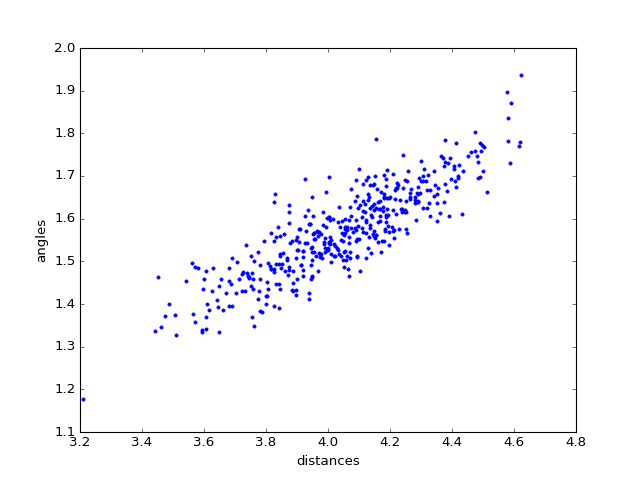

In [7]:
%matplotlib notebook
plot(distances, angles, '.'); xlabel('distances'); ylabel('angles');

and it is clear that the vectors are almost orthogonal (angles around $\pi/2$) and with distances clustered around a single value.

### Exercise 2.3

We can trivially solve both items by using a nonnegative "random variable" $x$ such that $P(x = 0) = 1$. Then, of course, $E(x) = 0$ and $P(x \ge a) = E(x) / a = 0$ for all positive $a$.

### Exercise 2.4

If we take a random variable $x$ such that $P(x = -1) = P(x = +1) = \frac{1}{2}$, then we clearly have $Var(x) = E(x^2) - E(x)^2 = 1 - 0 = 1$ and, if we choose $c = 1$, we get

$P(|x - E(x)| \ge 1) = P(|x| \ge 1) = 1 = \frac{1}{1^2} = \frac{Var(x)}{c^2}$.

To get a non-tight bound, it's as easy as using $c = 2$:

$P(|x - E(x)| \ge 1) = P(|x| \ge 1) = 0 \lt \frac{1}{2^2} = \frac{Var(x)}{c^2}$.

### Exercise 2.5

#### Item 2.5.1

We just have to impose normalization:

$\int_{-\infty}^\infty dx\,p(x) = 1$

$\int_1^\infty dx \frac{c}{x^4} = 1$

$\left. -\frac{c}{4 x^3} \right|_1^\infty = 1$

$\frac{c}{1^3} = 4$

$c = 4$

#### Item 2.5.2 

Calculating the expected value:

$\int_{-\infty}^\infty dx\,x p(x) = \int_1^\infty \frac{dx\,4}{x^3} = \left. -\frac{4}{3 x^2} \right|_1^\infty = \frac{4}{3}$

Simulating:

In [8]:
print 'E(x) ~=', np.average(stats.pareto.rvs(b=3, size=100))

E(x) ~= 1.56726739117


With 100 samples we expect a fractional deviation around 0.1, so the result is consistent.